In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op
from scipy.stats import chi2
plt.style.use('thomas')

In [2]:
plt.style.use('thomas')

In [3]:
x = np.linspace(75,125,50)

In [4]:
def bg(x,p):
    slope = -0.5
    return p + slope*x

In [5]:
def signal(x,p):
    mu = 100
    sigma = 5
    return p/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*((x-mu)/sigma)**2)

In [6]:
def model(x,p):
    return bg(x,p[0]) + signal(x,p[1])

In [7]:
par_bg = 200
bg_model = bg(x,par_bg)

In [8]:
par_sky = 250
sky_model = signal(x,par_sky)

In [9]:
par_model = [par_bg,par_sky]

Text(0, 0.5, 'y')

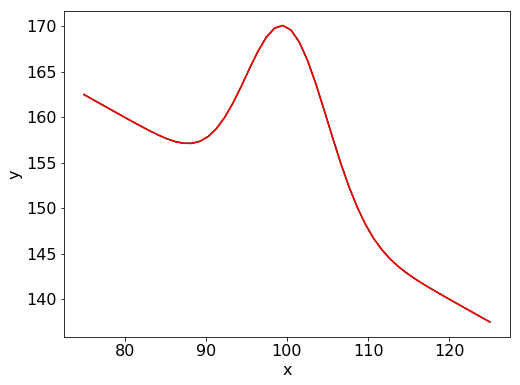

In [10]:
plt.plot(x,bg_model+sky_model)
plt.plot(x,model(x,par_model))
plt.xlabel('x')
plt.ylabel('y')

In [11]:
data = np.random.poisson(bg_model+sky_model)

In [12]:
def cstat(d,m):
    return np.sum(m-d*np.log(m))

In [13]:
def fit_total_model(p,x,data):
    m = model(x,p)
    d = data
    return cstat(d,m)

In [14]:
result = op.minimize(fit_total_model,[100,300],args=(x,data),options={'maxiter':1000})

In [15]:
result

      fun: -31503.076096556302
 hess_inv: array([[   3.59709655,  -38.36770308],
       [ -38.36770308, 2259.1547947 ]])
      jac: array([0.00024414, 0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 195
      nit: 19
     njev: 46
   status: 2
  success: False
        x: array([200.72471379, 249.76576878])

In [16]:
fit_pars = result.x
fit_loglik = result.fun

In [17]:
print(fit_pars)
print(par_model)

[200.72471379 249.76576878]
[200, 250]


Text(0, 0.5, 'y')

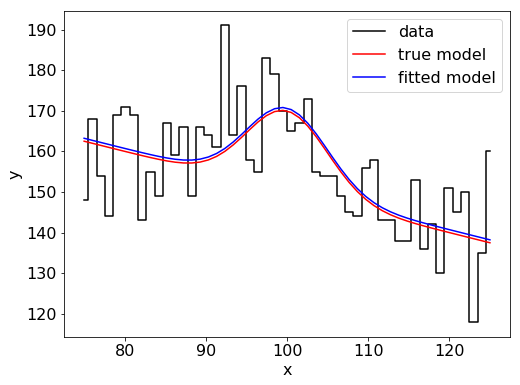

In [18]:
plt.step(x,data,where='mid',label='data')
plt.plot(x,bg_model+sky_model,label='true model')
plt.plot(x,model(x,fit_pars),label='fitted model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [19]:
def fit_bg_model(p,x,data):
    m = bg(x,p)
    d = data
    return cstat(d,m)

In [20]:
result_bg_only = op.minimize(fit_bg_model,par_bg,args=(x,data),options={'maxiter':1000})

In [21]:
result_bg_only

      fun: -31495.956775146253
 hess_inv: array([[3.05727297]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([205.60741118])

In [22]:
fit_pars_bg_only = result_bg_only.x
fit_loglik_bg_only = result_bg_only.fun

In [23]:
TS = 2*(fit_loglik_bg_only-fit_loglik)

In [24]:
print('LRT: {0:1.1f} sigma'.format(np.sqrt(TS)))

LRT: 3.8 sigma


In [25]:
N = 1000
TS_arr = np.zeros(N)
for i in range(N):
    tmp_data = np.random.poisson(bg_model)
    
    tmp_result_bg_only = op.minimize(fit_bg_model,par_bg,args=(x,tmp_data),options={'maxiter':10000})
    tmp_loglik_bg_only = tmp_result_bg_only.fun
    
    tmp_result = op.minimize(fit_total_model,par_model,args=(x,tmp_data),options={'maxiter':10000})
    tmp_loglik = tmp_result.fun
    
    if (tmp_result.success == True) & (tmp_result_bg_only.success == True):    
        TS_arr[i] = 2*(tmp_loglik_bg_only-tmp_loglik)

/usr/local/lib/python3.7/site-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Text(0, 0.5, 'PDF')

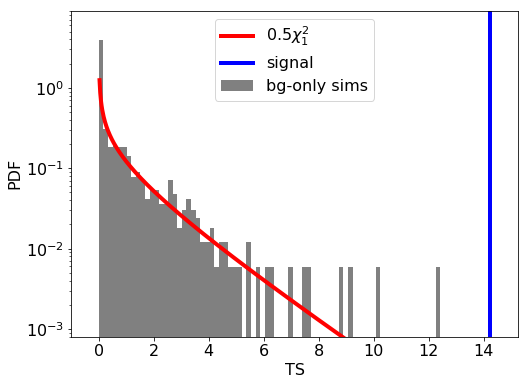

In [26]:
plt.hist(TS_arr,bins=np.linspace(0,25,150),density=True,color='gray',label='bg-only sims')
TS_vals = np.linspace(0,25,1000)
plt.plot(TS_vals,0.5*chi2.pdf(TS_vals,1),color='red',linewidth=4,label=r'$0.5\chi^2_1$')

plt.axvline(TS,color='blue',linewidth=4,label='signal')

plt.legend()

plt.yscale('log')
plt.ylim(1/N*0.8)
plt.xlim(-1,TS+1)

plt.xlabel('TS')
plt.ylabel('PDF')